In [19]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [10]:
Predict_utilization = pd.read_csv('input_hourly.csv')
Predict_utilization = Predict_utilization.dropna()
Predict_utilization.head()

,date,month,hour,dayOfTheWeek,site1_utilization,site2_utilization,site1_utilization_percentage,site2_utilization_percentage,temperature,precipitation
0,2018-01-01,1,0,0,0,0,0.0,0.0,9.0,0.0
1,2018-01-01,1,1,0,0,0,0.0,0.0,9.0,0.0
2,2018-01-01,1,2,0,0,0,0.0,0.0,9.0,0.0
3,2018-01-01,1,3,0,0,0,0.0,0.0,9.0,0.0
4,2018-01-01,1,4,0,0,0,0.0,0.0,8.0,0.0


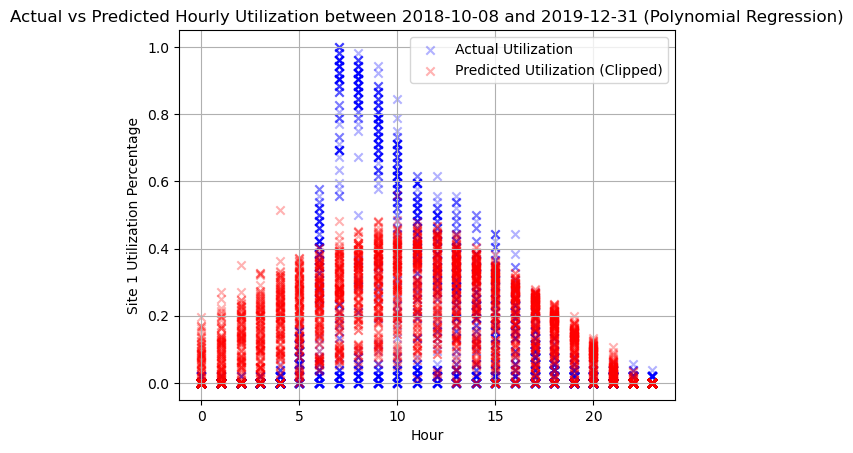

Mean Squared Error: 0.03154422812922516


In [69]:


date_filter = (Predict_utilization['date'] >= '2018-10-08') & (Predict_utilization['date'] < '2020-01-01')
filtered_data = Predict_utilization[date_filter]

# Features (X) and target variable (y)
features = ['month', 'hour', 'dayOfTheWeek', 'temperature', 'precipitation']
target = 'site1_utilization_percentage'

X = filtered_data[features]
y = filtered_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a polynomial regression model with regularization parameter alpha
# Larger alpha values increase the regularization strength
degree = 2  # Adjust the degree of the polynomial
alpha = 0.1  # Adjust the value of alpha based on your preference
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), Ridge(alpha=alpha))

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the existing hourly timestamps for prediction
hourly_predictions = model.predict(X_test)

# Clip predictions at 0 using a custom function
clip_at_zero = np.vectorize(lambda x: max(x, 0))
hourly_predictions_clipped = clip_at_zero(hourly_predictions)

# Sort X_test by 'hour' for a smoother plot
X_test_sorted = X_test.sort_values('hour')

# Plot the actual hourly utilization over a day
plt.scatter(X_test['hour'], y_test, marker='x', color='blue', alpha=0.3, label='Actual Utilization')

# Plot the clipped predicted hourly utilization over a day as red crosses
plt.scatter(X_test_sorted['hour'], clip_at_zero(model.predict(X_test_sorted)), marker='x', color='red', alpha=0.3, label='Predicted Utilization (Clipped)')
plt.xlabel('Hour')
plt.ylabel('Site 1 Utilization Percentage')
plt.title('Actual vs Predicted Hourly Utilization between 2018-10-08 and 2019-12-31 (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, hourly_predictions_clipped)
print(f'Mean Squared Error: {mse}')